In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2

## VGG19 Classification

In [3]:
def vgg19_classification(image_path, net, mean_val, class_names, 
                           net_name="", swap_channels=False):
    image = cv2.imread(image_path)
    
    if isinstance(mean_val, np.ndarray):
        tensor = cv2.dnn.blobFromImage(image, 1.0, (224, 224),
                                       1.0, False)
        tensor -= mean_val
    else:
        tensor = cv2.dnn.blobFromImage(image, 1.0, (224, 224),
                                       mean_val, swap_channels)
    
    net.setInput(tensor)
    start = time.time()
    prob = net.forward()
    end = time.time()
    prob = prob.flatten()
    
    # show timing information on VGGNet
    print("Forward Time: VGGNet took {:.6f} seconds.".format(end - start))
    
    r = 1
    for i in np.argsort(prob)[-5:]:
        txt = "Label: {}, {:.2f}%".format(class_names[i], prob[i])
        cv2.putText(image, txt, (10, image.shape[0] - r*30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2);
        r += 1
    
    # show the image after classifying
    plt.figure(figsize=(15, 12))
    plt.imshow(image[:, :, [2, 1, 0]])
    plt.axis('off')
    plt.grid(False)
    plt.show()

In [4]:
class_names_path = "./model/synset_words.txt"
with open(class_names_path) as f:
    class_names = [' '.join(l.split(' ')[1: ]).rstrip() for l in f.readlines()]

In [5]:
model_path = "./model/vgg19-bn.onnx"
vgg19 = cv2.dnn.readNetFromONNX(model_path)

Forward Time: VGGNet took 4.367250 seconds.


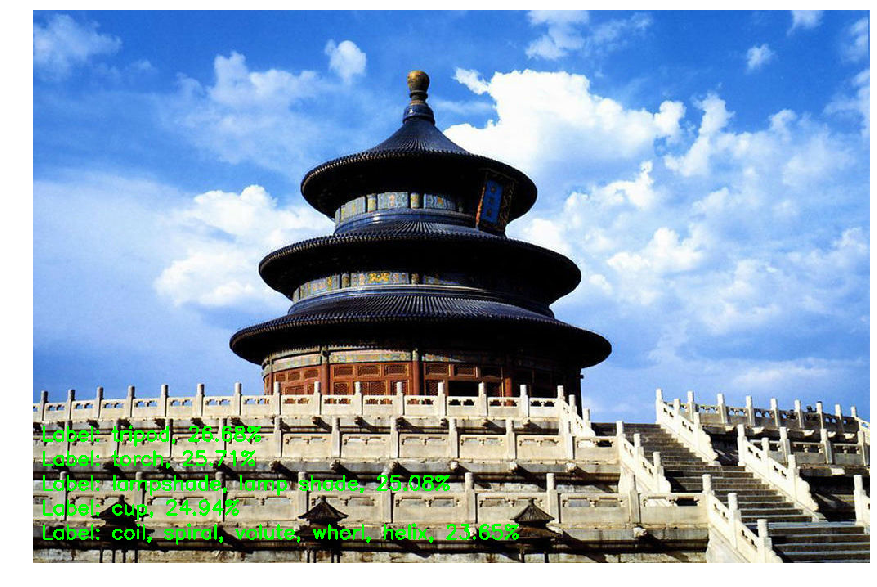

In [6]:
image_path = "../../../datasets/temple.jpg"
vgg19_classification(image_path, vgg19, (104, 117, 123), class_names)

Forward Time: VGGNet took 3.839219 seconds.


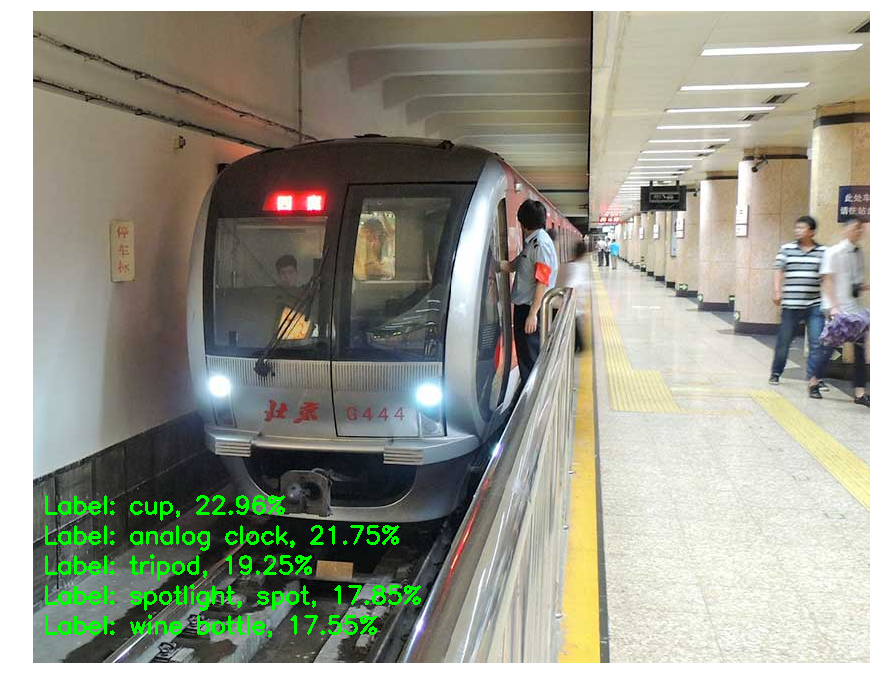

In [7]:
image_path = "../../../datasets/subway.jpg"
vgg19_classification(image_path, vgg19, (104, 117, 123), class_names)

Forward Time: VGGNet took 3.415195 seconds.


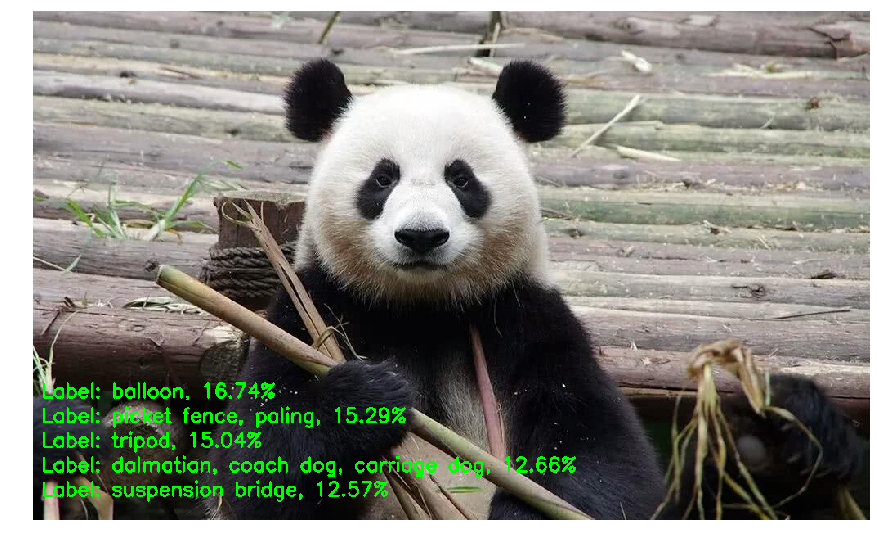

In [8]:
image_path = "../../../datasets/pandas.jpg"
vgg19_classification(image_path, vgg19, (104, 117, 123), class_names)